# Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.tree import plot_tree,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 2. Data Gathering¶

In [3]:
df=pd.read_csv("heart.csv")
df.T

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
age,63.0,37.0,41.0,56.0,57.0,57.0,56.0,44.0,52.0,57.0,...,67.0,44.0,63.0,63.0,59.0,57.0,45.0,68.0,57.0,57.0
sex,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
cp,3.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,...,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0
trestbps,145.0,130.0,130.0,120.0,120.0,140.0,140.0,120.0,172.0,150.0,...,152.0,120.0,140.0,124.0,164.0,140.0,110.0,144.0,130.0,130.0
chol,233.0,250.0,204.0,236.0,354.0,192.0,294.0,263.0,199.0,168.0,...,212.0,169.0,187.0,197.0,176.0,241.0,264.0,193.0,131.0,236.0
fbs,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
restecg,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
thalach,150.0,187.0,172.0,178.0,163.0,148.0,153.0,173.0,162.0,174.0,...,150.0,144.0,144.0,136.0,90.0,123.0,132.0,141.0,115.0,174.0
exang,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
oldpeak,2.3,3.5,1.4,0.8,0.6,0.4,1.3,0.0,0.5,1.6,...,0.8,2.8,4.0,0.0,1.0,0.2,1.2,3.4,1.2,0.0


# 1. Problem Statement

# 3. Exploratory Data Analysis

In [6]:
df.isna().sum() # checking null Values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.isna().mean()*100

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [7]:
df.info()# checking all columns are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

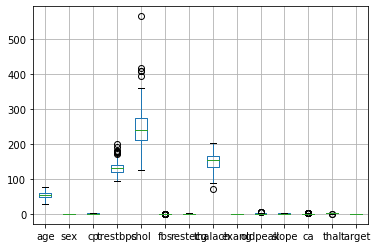

In [8]:
df.boxplot()

# 4. Feature Engineering

In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 5. Feature Selection

In [ ]:
vif>>varience inflation Factor

In [4]:
df1=df.drop("target",axis=1)
df1.T

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
age,63.0,37.0,41.0,56.0,57.0,57.0,56.0,44.0,52.0,57.0,...,67.0,44.0,63.0,63.0,59.0,57.0,45.0,68.0,57.0,57.0
sex,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
cp,3.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,...,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0
trestbps,145.0,130.0,130.0,120.0,120.0,140.0,140.0,120.0,172.0,150.0,...,152.0,120.0,140.0,124.0,164.0,140.0,110.0,144.0,130.0,130.0
chol,233.0,250.0,204.0,236.0,354.0,192.0,294.0,263.0,199.0,168.0,...,212.0,169.0,187.0,197.0,176.0,241.0,264.0,193.0,131.0,236.0
fbs,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
restecg,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
thalach,150.0,187.0,172.0,178.0,163.0,148.0,153.0,173.0,162.0,174.0,...,150.0,144.0,144.0,136.0,90.0,123.0,132.0,141.0,115.0,174.0
exang,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
oldpeak,2.3,3.5,1.4,0.8,0.6,0.4,1.3,0.0,0.5,1.6,...,0.8,2.8,4.0,0.0,1.0,0.2,1.2,3.4,1.2,0.0


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
vif_df=pd.DataFrame()
vif_df["Features"]=df1.columns
vif_df

,Features
0,age
1,sex
2,cp
3,trestbps
4,chol
5,fbs
6,restecg
7,thalach
8,exang
9,oldpeak


In [8]:
vif_list=[]
for i in range(df1.shape[1]):
    vif=variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)
vif_list    

[38.9983045400946,
 3.5232112128032593,
 2.4144034238575776,
 58.55733502905999,
 26.267365463248847,
 1.2682053194474163,
 2.058205648620228,
 42.74217843606572,
 2.0225272822707834,
 3.062890157787379,
 10.072734287524087,
 1.8089253955425697,
 17.165303070977725]

In [16]:
vif_df["VIF_LIST"]=vif_list
vif_df

,Features,VIF_LIST
0,age,38.998305
1,sex,3.523211
2,cp,2.414403
3,trestbps,58.557335
4,chol,26.267365
5,fbs,1.268205
6,restecg,2.058206
7,thalach,42.742178
8,exang,2.022527
9,oldpeak,3.062890


In [9]:
# vif_df.insert(3,"vif_list1",vif_list)
vif_df.dropna(axis=0)
vif_df

,Features
0,age
1,sex
2,cp
3,trestbps
4,chol
5,fbs
6,restecg
7,thalach
8,exang
9,oldpeak


In [10]:
vif_list

[38.9983045400946,
 3.5232112128032593,
 2.4144034238575776,
 58.55733502905999,
 26.267365463248847,
 1.2682053194474163,
 2.058205648620228,
 42.74217843606572,
 2.0225272822707834,
 3.062890157787379,
 10.072734287524087,
 1.8089253955425697,
 17.165303070977725]

In [21]:
vif_df=pd.DataFrame({"Features":df1.columns,"vif_list":vif_list}).sort_values("vif_list").reset_index(drop=True)
vif_df

,Features,vif_list
0,fbs,1.268205
1,ca,1.808925
2,exang,2.022527
3,restecg,2.058206
4,cp,2.414403
5,oldpeak,3.062890
6,sex,3.523211
7,slope,10.072734
8,thal,17.165303
9,chol,26.267365


# Train Model

In [25]:
x=df.drop("target",axis=1)
y=df["target"]


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y,random_state=10)

In [27]:
y_train.value_counts()

1    124
0    103
Name: target, dtype: int64

In [28]:
y_test.value_counts()

1    41
0    35
Name: target, dtype: int64

# Instantiating Logestic Regression Model

In [31]:
logestic_reg_model=LogisticRegression()
logestic_reg_model.fit(x_train,y_train)

LogisticRegression()

In [30]:
import warnings
warnings.filterwarnings("ignore")

# Evaluation

In [32]:
# Evaluation on testing DataSet
y_pred=logestic_reg_model.predict(x_test)

confusion_matx=confusion_matrix(y_test,y_pred)
print("confusion_matrix:\n",confusion_matx)

acc_score=accuracy_score(y_test,y_pred)
print("accuracy_score:\n",acc_score)

clf_report=classification_report(y_test,y_pred)
print("classification_report:\n",clf_report)

confusion_matrix:
 [[29  6]
 [ 4 37]]
accuracy_score:
 0.868421052631579
classification_report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.86      0.90      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



In [33]:
# Evaluation on training DataSet
y_pred_train=logestic_reg_model.predict(x_train)

confusion_matx=confusion_matrix(y_train,y_pred_train)
print("confusion_matrix:\n",confusion_matx)

acc_score=accuracy_score(y_train,y_pred_train)
print("accuracy_score:\n",acc_score)

clf_report=classification_report(y_train,y_pred_train)
print("classification_report:\n",clf_report)

confusion_matrix:
 [[ 79  24]
 [ 11 113]]
accuracy_score:
 0.8458149779735683
classification_report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       103
           1       0.82      0.91      0.87       124

    accuracy                           0.85       227
   macro avg       0.85      0.84      0.84       227
weighted avg       0.85      0.85      0.84       227



# Knn KNeighborsClassifier

### Scaling 1. Normalization¶

In [37]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [68]:
normal_scaler = MinMaxScaler()
x_new=x.drop(["sex","cp","fbs","restecg","slope","ca","thal","exang"],axis=1)
x_new
normal_scaler.fit(x_new) # saving Minimum and Maximum value
normalized_array = normal_scaler.transform(x_new)
x_df = pd.DataFrame(normalized_array,columns=x_new.columns)
x_df_1=x[["sex","cp","fbs","restecg","slope","ca","thal","exang"]]
x_df_2=pd.concat([x_df,x_df_1],axis=1)
x_df_2
# x_df_1

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,slope,ca,thal,exang
0,0.708333,0.481132,0.244292,0.603053,0.370968,1,3,1,0,0,0,1,0
1,0.166667,0.339623,0.283105,0.885496,0.564516,1,2,0,1,0,0,2,0
2,0.250000,0.339623,0.178082,0.770992,0.225806,0,1,0,0,2,0,2,0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1,1,0,1,2,0,2,0
4,0.583333,0.245283,0.520548,0.702290,0.096774,0,0,0,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.433962,0.262557,0.396947,0.032258,0,0,0,1,1,0,3,1
299,0.333333,0.150943,0.315068,0.465649,0.193548,1,3,0,1,1,0,3,0
300,0.812500,0.471698,0.152968,0.534351,0.548387,1,0,1,1,1,2,3,0
301,0.583333,0.339623,0.011416,0.335878,0.193548,1,0,0,1,1,1,3,1


# 2 .Standardization

In [36]:
std_scaler = StandardScaler() # saving std and mean value
std_scaler.fit(x) # 

std_array = std_scaler.transform(x)
x_df = pd.DataFrame(std_array,columns=x.columns)
x_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029


# By using Normalization

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x_df_2,y,test_size=0.2,random_state=20,stratify=y)

In [70]:
knn_regresor_model=KNeighborsClassifier()
knn_regresor_model.fit(x_train,y_train)

KNeighborsClassifier()

In [72]:
## Testing Data Evaluation
print("************ Testing Data Evaluation ********************")
y_pred = knn_regresor_model.predict(x_test)
print("*"*70)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*70)
acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score :",acc_score)
print("*"*70)
clf_report = classification_report(y_test,y_pred)
print("Classification Report :\n",clf_report)
print("*"*70)

************ Testing Data Evaluation ********************
**********************************************************************
Confusion Matrix :
 [[21  7]
 [ 4 29]]
**********************************************************************
Accuracy Score : 0.819672131147541
**********************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61

**********************************************************************


In [71]:
## Training Data Evaluation
print("************ Testing Data Evaluation ********************")
y_pred_train = knn_regresor_model.predict(x_train)
print("*"*70)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*70)
acc_score = accuracy_score(y_train,y_pred_train)
print("Accuracy Score :",acc_score)
print("*"*70)
clf_report = classification_report(y_train,y_pred_train)
print("Classification Report :\n",clf_report)
print("*"*70)

************ Testing Data Evaluation ********************
**********************************************************************
Confusion Matrix :
 [[ 91  19]
 [ 11 121]]
**********************************************************************
Accuracy Score : 0.8760330578512396
**********************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       110
           1       0.86      0.92      0.89       132

    accuracy                           0.88       242
   macro avg       0.88      0.87      0.87       242
weighted avg       0.88      0.88      0.88       242

**********************************************************************


# Hyperparameters

In [75]:
knn_clf=KNeighborsClassifier(p=2,n_neighbors=2)
hyperparameters={"n_neighbors":np.arange(2,20),
                "p":[1,2]}
gscv_knn_clf=GridSearchCV(knn_clf,hyperparameters,cv=2)
gscv_knn_clf.fit(x_train,y_train)
gscv_knn_clf.best_params_

{'n_neighbors': 8, 'p': 1}

# KNN after Hyperparameter Tuning

In [76]:
knn_clf = gscv_knn_clf.best_estimator_
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8, p=1)

In [77]:
# Testing Data Evaluation
y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

acc_score = accuracy_score(y_test, y_pred)
print("Accuracy :",acc_score)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[21  7]
 [ 6 27]]
Accuracy : 0.7868852459016393
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.79      0.82      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [78]:
# Training Data Evaluation
y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy :",acc_score)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[ 97  13]
 [ 19 113]]
Accuracy : 0.8677685950413223
Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.90      0.86      0.88       132

    accuracy                           0.87       242
   macro avg       0.87      0.87      0.87       242
weighted avg       0.87      0.87      0.87       242



# Descion Tree

In [80]:
# Train Model
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [81]:
# Testing Data Accuracy
y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[23  5]
 [ 8 25]]
**************************************************
Accuracy Score is : 0.7868852459016393
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.74      0.82      0.78        28
           1       0.83      0.76      0.79        33

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [84]:
# Training Data Accuracy
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[110   0]
 [  0 132]]
**************************************************
Accuracy Score is : 1.0
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



# Decision Tree After Hyper parameter Tuning

In [85]:
dt_clf = DecisionTreeClassifier()

hyperparameters = {
                    "criterion" : ['gini','entropy'],
                    "max_depth" : np.arange(3,8),
                    "min_samples_split" : np.arange(2,20),
                    "min_samples_leaf": np.arange(2,10)
                    }

gscv_dt_model = GridSearchCV(dt_clf,hyperparameters, cv = 5)
gscv_dt_model.fit(x_train, y_train)
gscv_dt_model.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=3)

In [24]:
dt_clf = DecisionTreeClassifier()??

SyntaxError: invalid syntax (2644167329.py, line 1)

In [86]:
dt_clf = gscv_dt_model.best_estimator_
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=3)

In [87]:
# Testing Data Accuracy
y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[21  7]
 [ 6 27]]
**************************************************
Accuracy Score is : 0.7868852459016393
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.79      0.82      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [88]:
# Training Data Accuracy
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[102   8]
 [  8 124]]
**************************************************
Accuracy Score is : 0.9338842975206612
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       110
           1       0.94      0.94      0.94       132

    accuracy                           0.93       242
   macro avg       0.93      0.93      0.93       242
weighted avg       0.93      0.93      0.93       242



In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(200,160))
plot_tree(dt_clf,feature_names=x.columns,class_names=["0","1"],filled=True)
plt.savefig("DecionTree.jpg")

# Random Forest

In [97]:
rf_clr=RandomForestClassifier(random_state=20)
rf_clr.fit(x_train,y_train)

RandomForestClassifier(random_state=20)

In [98]:
# Testing Data Accuracy
y_pred = rf_clr.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[24  4]
 [ 5 28]]
**************************************************
Accuracy Score is : 0.8524590163934426
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [99]:
# Training Data Accuracy
y_pred_train = rf_clr.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[110   0]
 [  0 132]]
**************************************************
Accuracy Score is : 1.0
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [107]:
# Random Forest with Hyperparameter tuning
rf_clr=RandomForestClassifier(random_state=20)
Hyper={"n_estimators":np.arange(0,150),
    "criterion":['gini',"entropy"],
    "max_depth":np.arange(0,15),
    "min_samples_split":np.arange(0,15),
    "min_samples_leaf":np.arange(5,35),
    "max_features":['auto'],
    }
rscv_rf_clr=RandomizedSearchCV(rf_clr,Hyper,cv=5)
rscv_rf_clr.fit(x_train,y_train)
rscv_rf_clr.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=28,
                       min_samples_split=5, n_estimators=106, random_state=20)

In [109]:
rf_clr=RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=28,
                       min_samples_split=5, n_estimators=106, random_state=20,oob_score=True,bootstrap=True)
rf_clr.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=28,
                       min_samples_split=5, n_estimators=106, oob_score=True,
                       random_state=20)

In [110]:
# Testing Data Accuracy
y_pred = rf_clr.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[21  7]
 [ 4 29]]
**************************************************
Accuracy Score is : 0.819672131147541
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61



In [111]:
# Training Data Accuracy
y_pred_train = rf_clr.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)
acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy Score is :",acc_score)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[ 85  25]
 [ 13 119]]
**************************************************
Accuracy Score is : 0.8429752066115702
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.77      0.82       110
           1       0.83      0.90      0.86       132

    accuracy                           0.84       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.84      0.84       242



In [ ]:
#Heart Dtatset
# logestic Regression
Testing Accuracy=86.84
Training Aaccuracy=84.58
#knn with normalization 
Testing Accuracy=81.96
Training Aaccuracy=87.60
#knn with normalization with hyperparameter
Testing Accuracy=78.68
Training Aaccuracy=86.77
#Decision Tree 
Testing Accuracy=78.68
Training Aaccuracy=100.00
# Descision tree with hyperparameters
Testing Accuracy=78.68
Training Aaccuracy=93.38
# Random Forest
Testing Accuracy=85.24
Training Aaccuracy=100
# Random Forest with hyperparameters
Testing Accuracy=81.96
Training Aaccuracy=84.29